# Maps of amplitude and phase of the harmonic analysis of sea surface height from eNATL60 model and FES2014 product

## Prerequisite

 - the harmonic analysis of eNATL60 ssh from 01/07/2009 to 30/06/2010 at (M2,S2,N2,O1,K1) frequencies is done using [TIDAL-TOOLS](https://github.com/molines/TIDAL_TOOLS) using a [script](https://github.com/ocean-next/eNATL60/tree/master/04_assessment/barotropic-tide/scripts/make_tidal_amp_phase.ksh) that ran on occigen, CINES
 - the FES2014 product is available ??

## All the imports needed to produced the plots

In [1]:
# General and file management
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import dask.array as da

#For the plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker

import cartopy
cartopy.config['pre_existing_data_dir'] = '/scratch/cnt0024/hmg2840/albert7a/DEV/git/cartopy_data'
import cartopy.crs as ccrs
import cmocean

import warnings
warnings.filterwarnings('ignore')

#Jupyter magics
%matplotlib inline

## Plots functions for one map

### For eNATL60 outputs

In [2]:
def one_plot_cont_natl60_noblack0(ax,freq,var,var2,varname,vmin,vmax,cmap):
    '''This function plots the amplitude (colour) and phase (contours) of eNATL60 harmonic analysis for a given frequency'''

    # Opening the file and loading the data 
    ds=xr.open_dataset('/scratch/cnt0024/hmg2840/albert7a/eNATL60/eNATL60-BLBT02-S/1h/tide/res_harm_ssh_0-360.nc',chunks={'x':1000,'y':1000})
    lat=ds['nav_lat']
    lon=ds['nav_lon']
    amp=ds[var]
    ph=ds[var2]
    
    # Offsetting the phase
    ph360=da.where(ph<0,ph+360,ph)
    
    # Plot cosmetics
    ax.coastlines(resolution="10m")
    ax.set_extent([-100,50,0,60])
    gl = ax.gridlines(crs=pj, draw_labels=True, linewidth=1, color='black', alpha=0.2, linestyle='--')
    label_style= {'size' : 12, 'color' : 'black'}
    gl.xlabel_style = label_style
    gl.xlabels_top = False
    gl.xlocator = mticker.FixedLocator(np.arange(-110,100,20,dtype=float))
    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-20,90,10,dtype=float))

    # Map of amplitude, contours of phase
    cs = plt.pcolormesh(lon, lat, amp,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    plt.contour(lon,lat,ph360,[30,60,90,120,150,180,210,240,270,300,330],cmap=cmocean.cm.phase,linestyle='solid',linewidths=1,transform=ccrs.PlateCarree())
    plt.title(freq+' '+varname+' eNATL60')
    cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='m')
    

### For FES2014 data

In [3]:
def one_plot_cont_fes_noblack0(ax,freq,var,var2,varname,vmin,vmax,cmap):
    '''This function plots the amplitude (colour) and phase (contours) of FES2014 data for a given frequency'''

    # Opening the file and loading the data 
    ds=xr.open_dataset('/scratch/cnt0024/hmg2840/albert7a/FES2014/'+freq+'.FES2014b_elevation_RI_AP_0-360.nc')
    lon=ds['lon']
    lat=ds['lat']
    amp=ds[var]
    ph=ds[var2]

    # Masking data
    mask=amp>0
    mask_one=mask.astype(int)
    amp_ma=np.ma.masked_where(1-mask_one,amp)
    mask_phi=ph!=45
    mask_one_phi=mask_phi.astype(int)
    ph_ma=np.ma.masked_where(1-mask_one_phi,ph)

    # Plot cosmetics
    ax.coastlines(resolution="10m")
    ax.set_extent([-100,50,0,60])
    gl = ax.gridlines(crs=pj, draw_labels=True, linewidth=1, color='black', alpha=0.2, linestyle='--')
    label_style= {'size' : 12, 'color' : 'black'}
    gl.xlabel_style = label_style
    gl.xlabels_top = False
    gl.xlocator = mticker.FixedLocator(np.arange(-110,100,20,dtype=float))
    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-20,90,10,dtype=float))
    
    # Map of amplitude, contours of phase
    cs = plt.pcolormesh(lon, lat, amp_ma,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    plt.contour(lon,lat,ph_ma,[30,60,90,120,150,180,210,240,270,300,330],cmap=cmocean.cm.phase,linestyle='solid',linewidths=1,transform=ccrs.PlateCarree())
    plt.title(freq+' '+varname+' FES2014')
    cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='m')


### All the plots in one figure

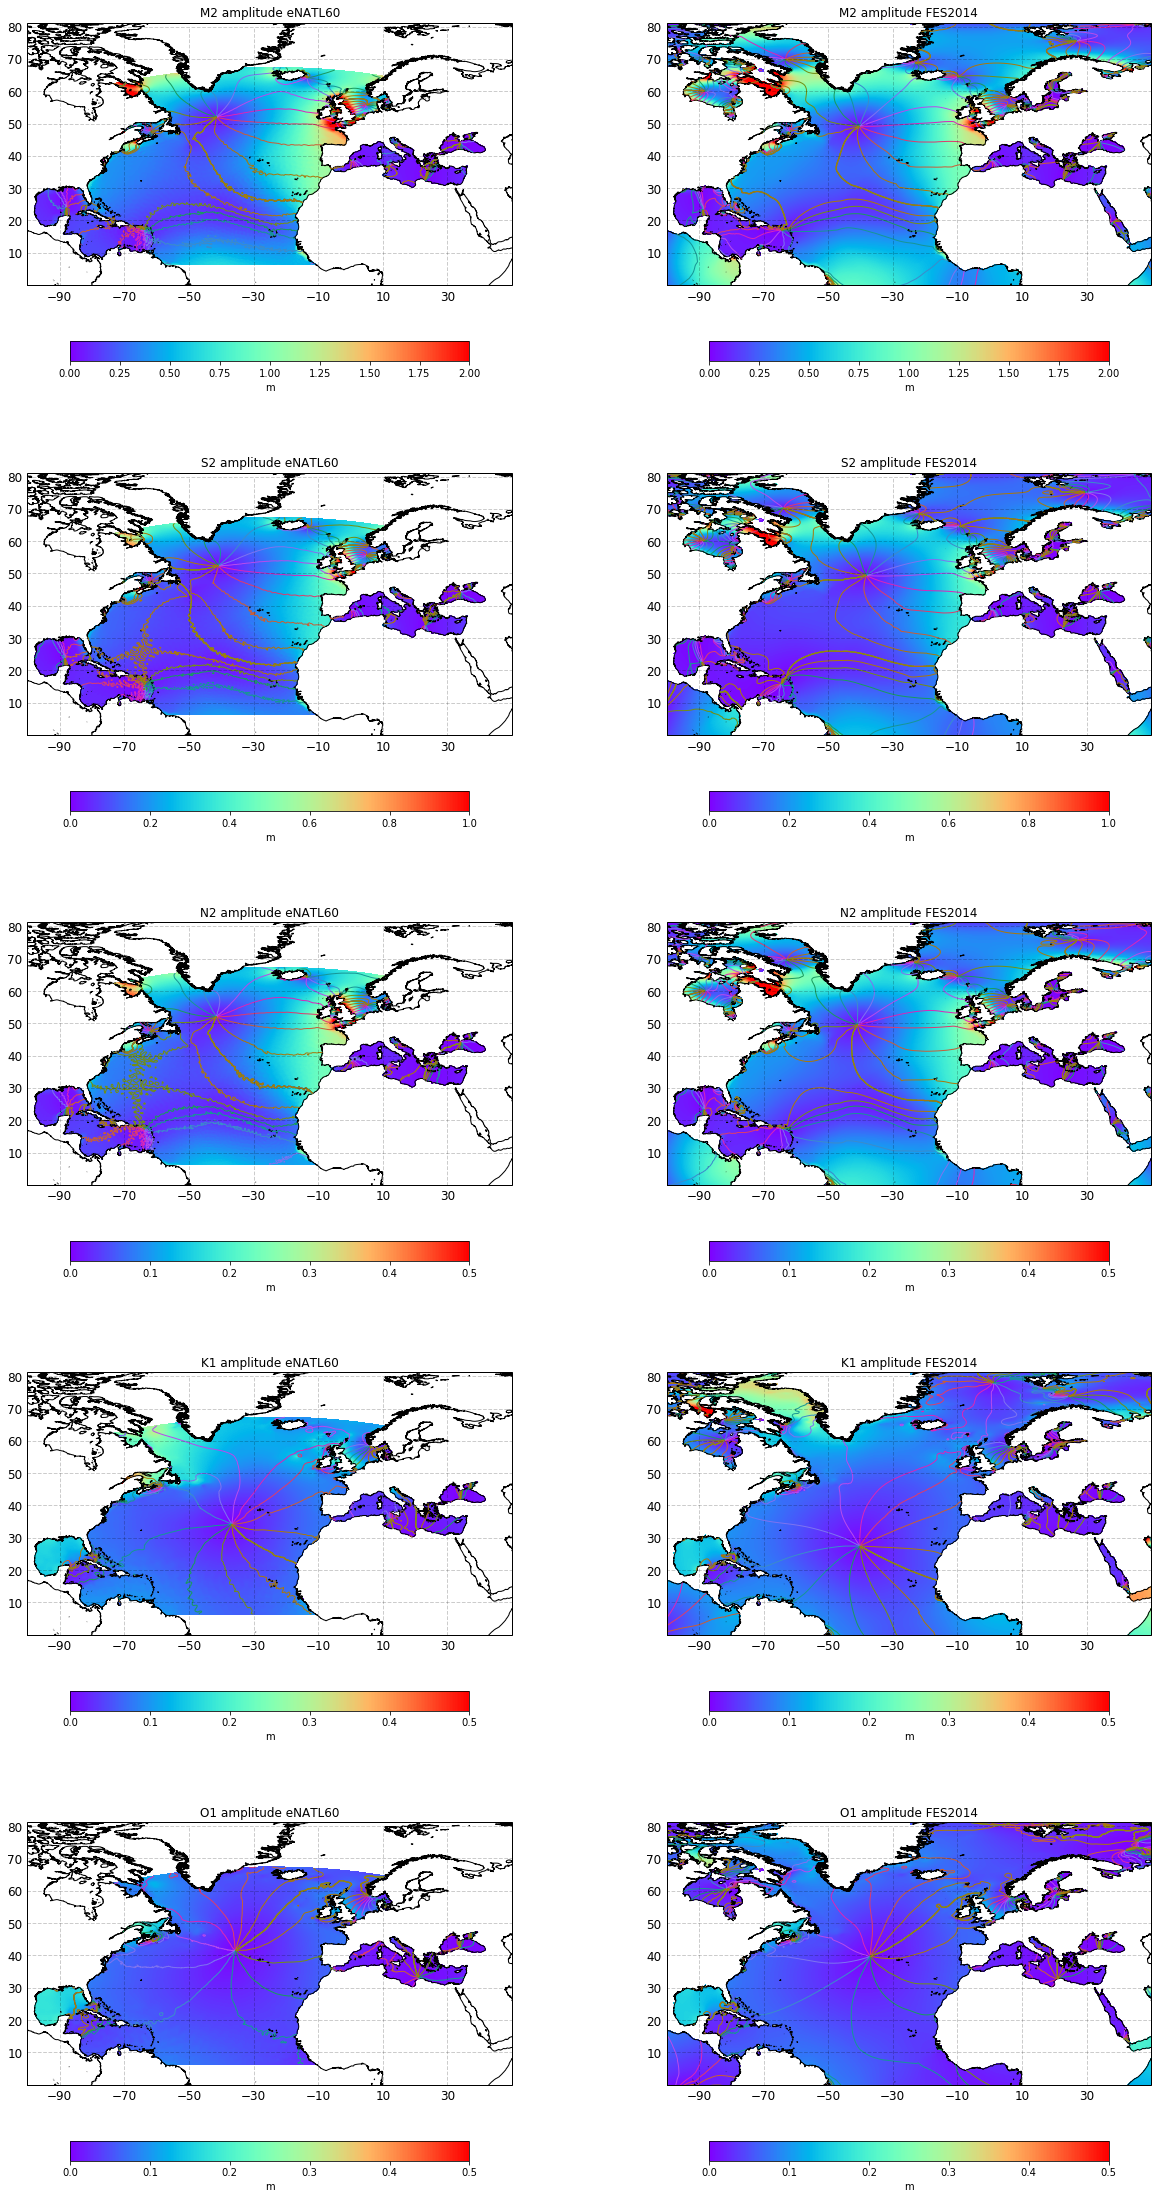

In [8]:
# Choosing colormap
cmap=plt.get_cmap('rainbow')
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
matplotlib.rcParams['lines.linewidth']= 2

fig=plt.figure(figsize=(21,40))
pj= ccrs.PlateCarree()

ax=plt.subplot(5,2,1,projection=pj)
one_plot_cont_natl60_noblack0(ax,'M2','M2_A','M2_G','amplitude',0,2,cmap)

ax=plt.subplot(5,2,2,projection=pj)
one_plot_cont_fes_noblack0(ax,'M2','r','phi','amplitude',0,2,cmap)

ax=plt.subplot(5,2,3,projection=pj)
one_plot_cont_natl60_noblack0(ax,'S2','S2_A','S2_G','amplitude',0,1,cmap)

ax=plt.subplot(5,2,4,projection=pj)
one_plot_cont_fes_noblack0(ax,'S2','r','phi','amplitude',0,1,cmap)

ax=plt.subplot(5,2,5,projection=pj)
one_plot_cont_natl60_noblack0(ax,'N2','N2_A','N2_G','amplitude',0,0.5,cmap)

ax=plt.subplot(5,2,6,projection=pj)
one_plot_cont_fes_noblack0(ax,'N2','r','phi','amplitude',0,0.5,cmap)

ax=plt.subplot(5,2,7,projection=pj)
one_plot_cont_natl60_noblack0(ax,'K1','K1_A','K1_G','amplitude',0,0.5,cmap)

ax=plt.subplot(5,2,8,projection=pj)
one_plot_cont_fes_noblack0(ax,'K1','r','phi','amplitude',0,0.5,cmap)

ax=plt.subplot(5,2,9,projection=pj)
one_plot_cont_natl60_noblack0(ax,'O1','O1_A','O1_G','amplitude',0,0.5,cmap)

ax=plt.subplot(5,2,10,projection=pj)
one_plot_cont_fes_noblack0(ax,'O1','r','phi','amplitude',0,0.5,cmap)

plt.savefig('../plots/maps_amp_phi_M2N2S2K1O1_eNATL60-FES2014_noblack0.png')

### Individual plots

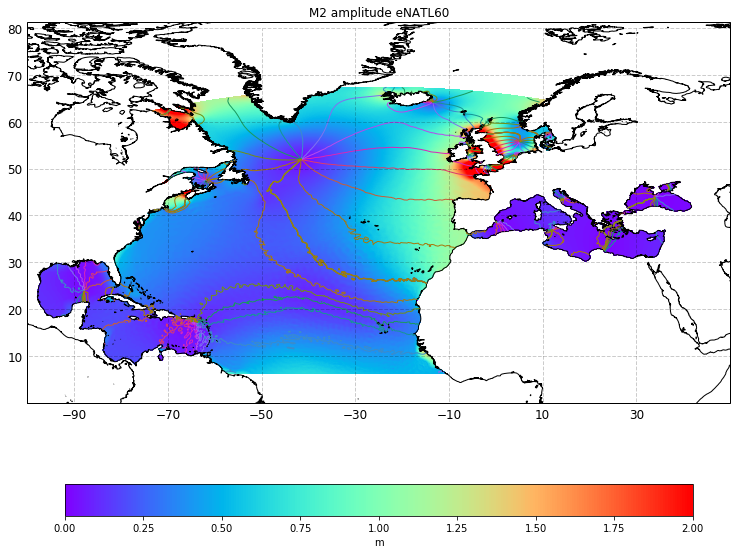

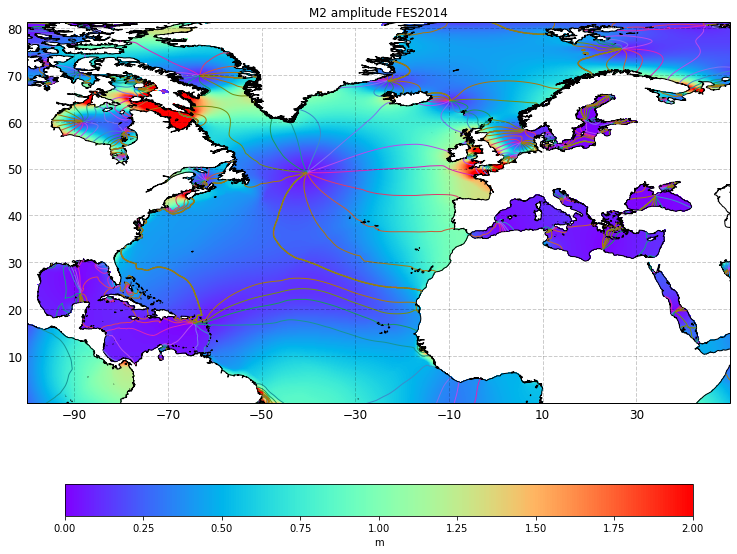

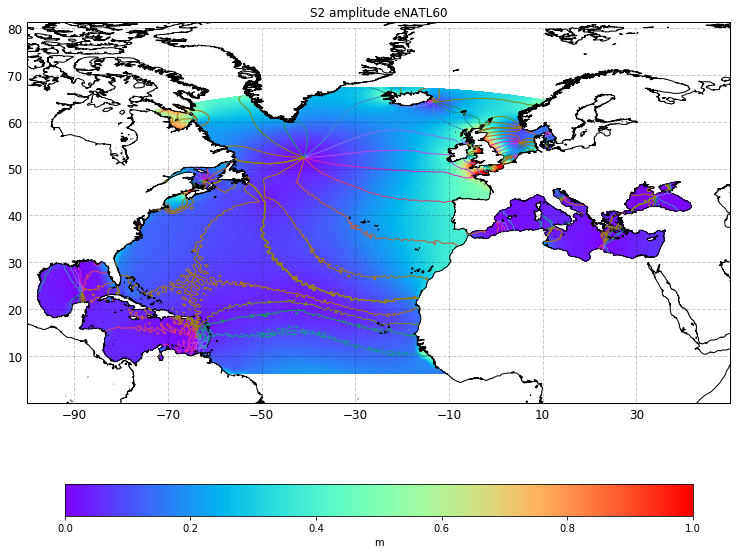

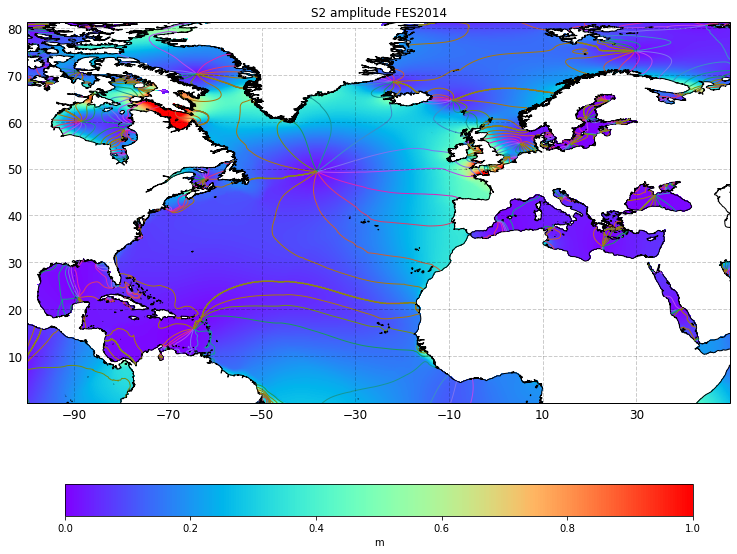

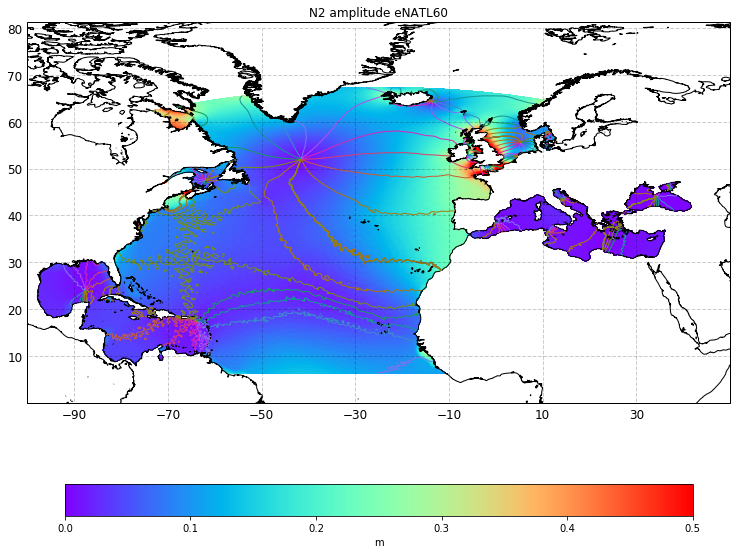

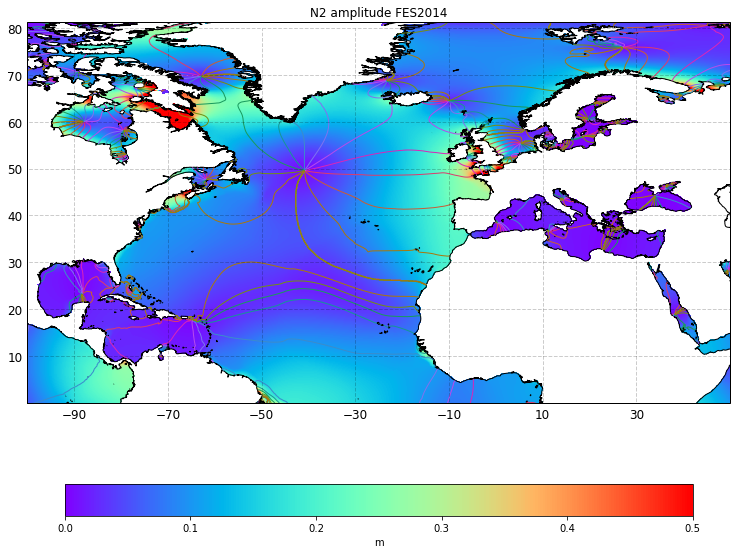

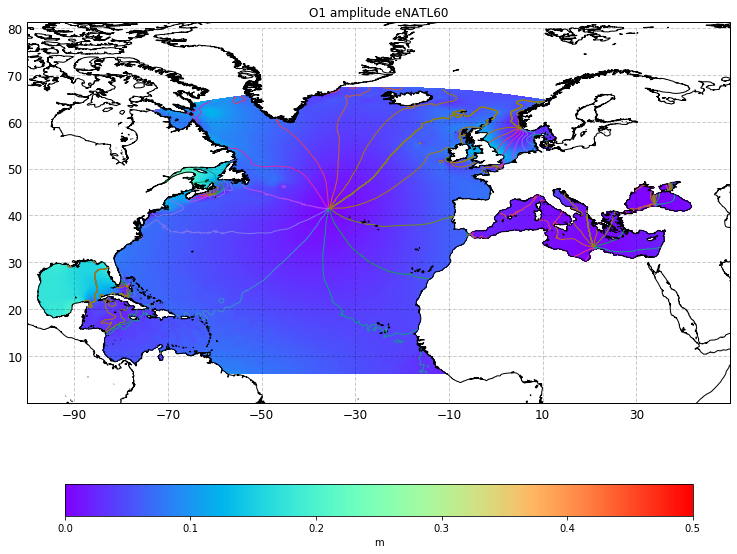

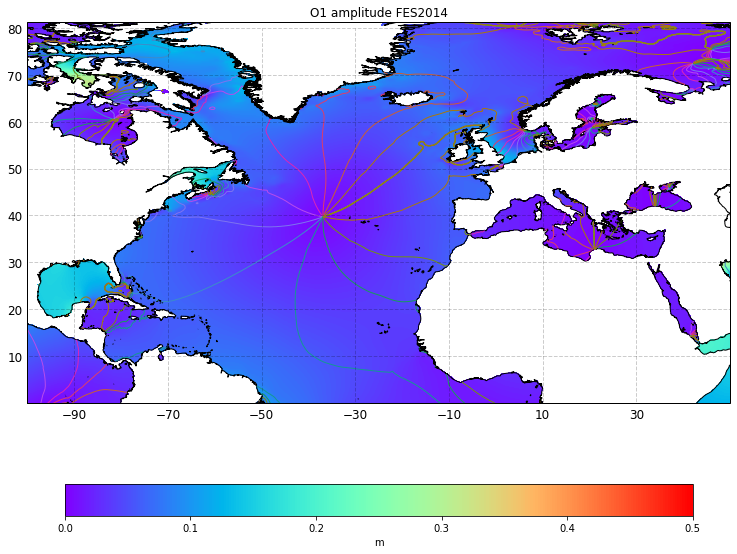

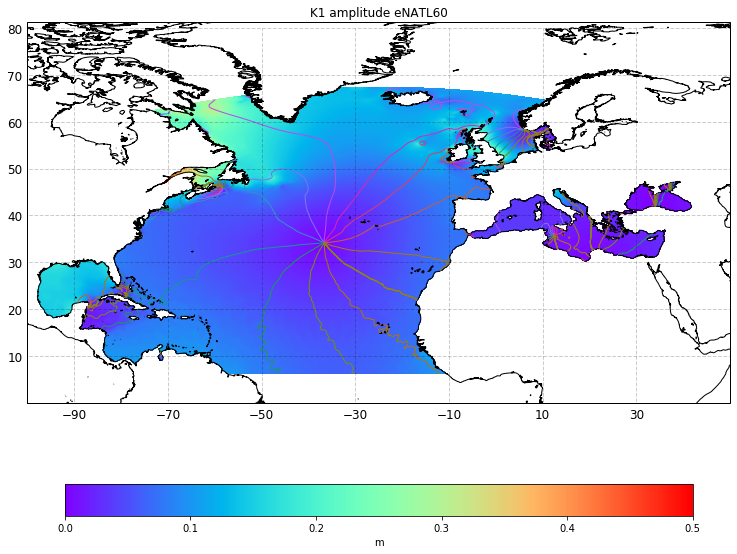

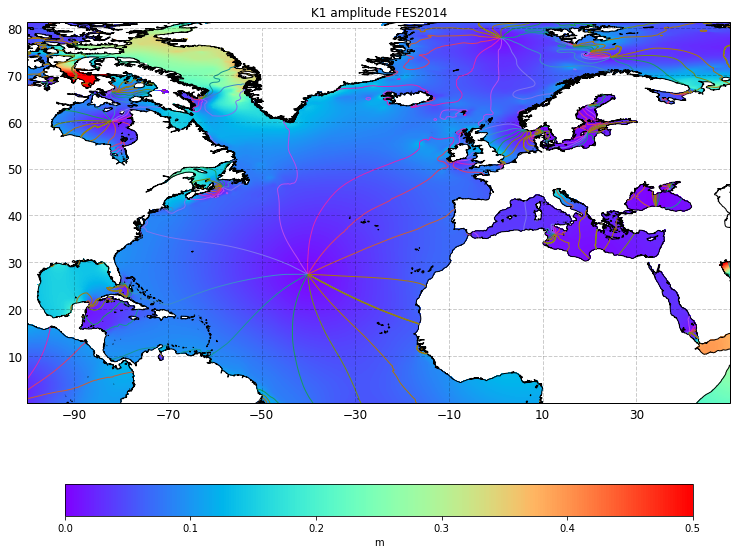

In [4]:
# Choosing colormap
cmap=plt.get_cmap('rainbow')
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
matplotlib.rcParams['lines.linewidth']= 2
pj= ccrs.PlateCarree()

vmax={'M2':2,'S2':1,'N2':0.5,'O1':0.5,'K1':0.5}

for freq in ['M2','S2','N2','O1','K1']:
    fig=plt.figure(figsize=(15,10))
    ax=plt.subplot(1,1,1,projection=pj)
    one_plot_cont_natl60_noblack0(ax,freq,freq+'_A',freq+'_G','amplitude',0,vmax[freq],cmap)
    plt.savefig('maps_amp_phi_'+freq+'_eNATL60_noblack0.png')
    fig=plt.figure(figsize=(15,10))
    ax=plt.subplot(1,1,1,projection=pj)
    one_plot_cont_fes_noblack0(ax,freq,'r','phi','amplitude',0,vmax[freq],cmap)
    plt.savefig('maps_amp_phi_'+freq+'_FES2014_noblack0.png')


